# **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Loading Dataset**

**View Data**

In [3]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


**Data Description**

In [4]:
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [8]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [11]:
print(iris["variety"].value_counts())

Virginica     50
Setosa        50
Versicolor    50
Name: variety, dtype: int64


# **Visualization of dataset**

**Different classes in dataset**

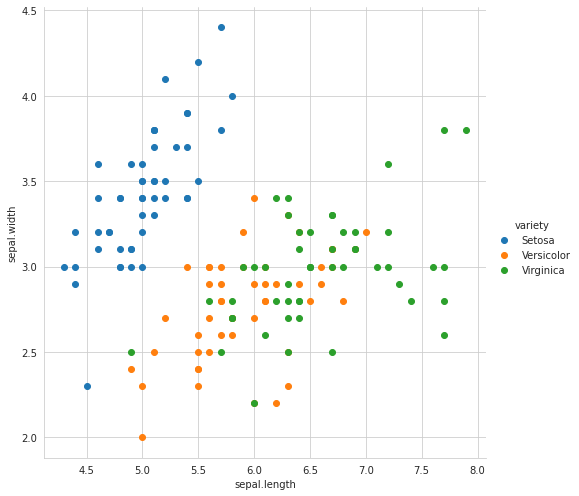

In [23]:
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="variety", height=7) \
   .map(plt.scatter, "sepal.length", "sepal.width") \
   .add_legend();
plt.show();

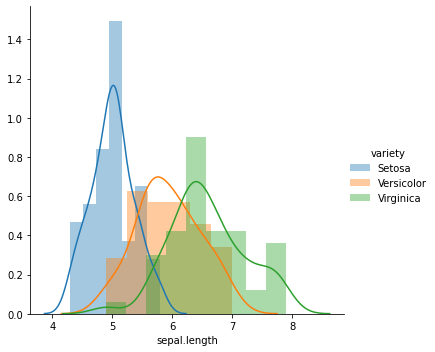

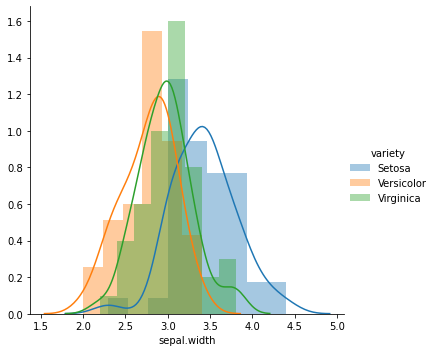

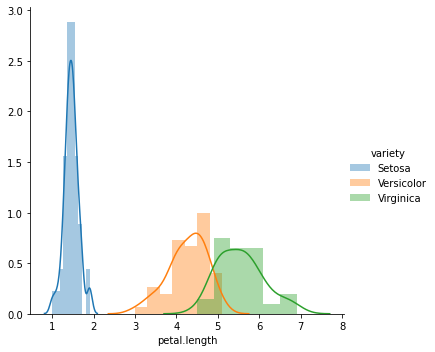

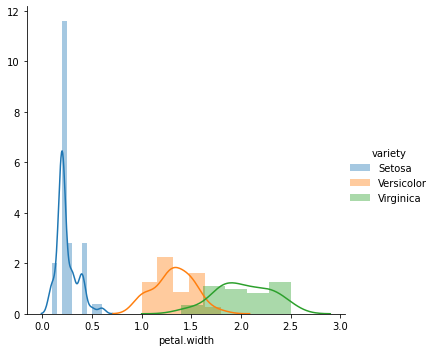

In [12]:
for ojha, feature in enumerate(list(iris.columns)[:-1]):
    fg = sns.FacetGrid(iris, hue='variety', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

**Pairplot**

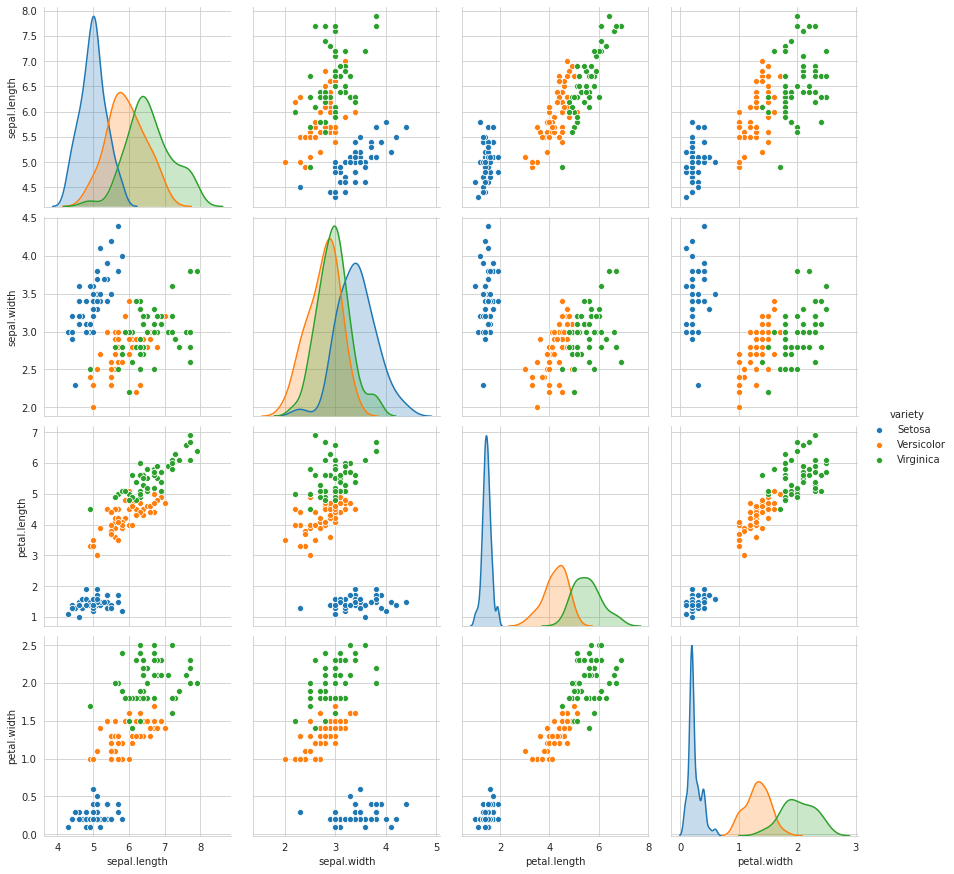

In [24]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="variety", height=3);
plt.show()

In [27]:
x = iris.iloc[:,:2]
x

,sepal.length,sepal.width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


# **Elbow Method**

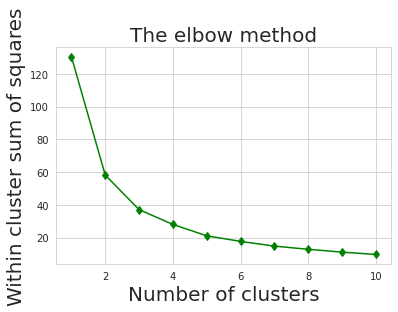

In [35]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)   

plt.plot(range(1, 11), wcss,marker="d",color="g")
plt.title('The elbow method',size=20)
plt.xlabel('Number of clusters',size=20)
plt.ylabel('Within cluster sum of squares',size=20) 
plt.show()

Here we can see that optimal no of clusters is 3 (as per the elbow method)

# **K-Means Clustering**

In [37]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(x)
centers = km.cluster_centers_
print(centers)

[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


In [44]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# **Prediction**

Text(0.5, 1.0, 'Predicted')

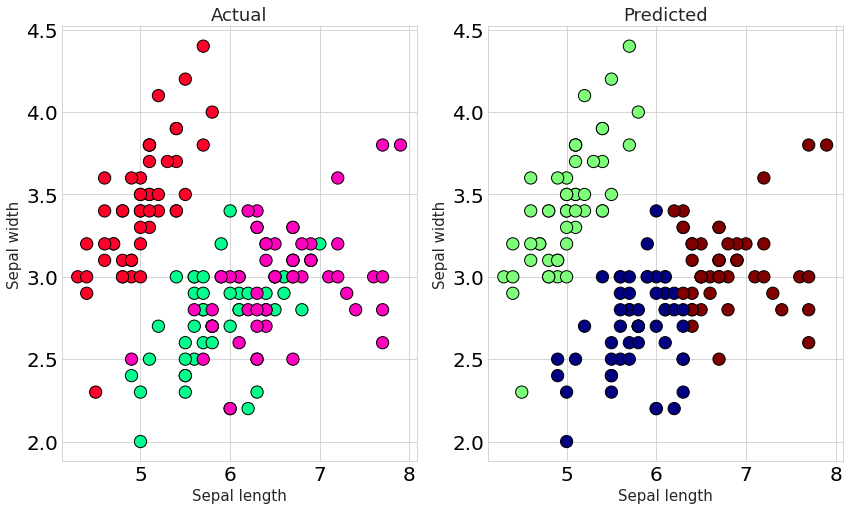

In [76]:
new_labels = km.labels_
X = iris.data[:, :2]
y = iris.target
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(14,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=15)
axes[0].set_ylabel('Sepal width', fontsize=15)
axes[1].set_xlabel('Sepal length', fontsize=15)
axes[1].set_ylabel('Sepal width', fontsize=15)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)